In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import pickle
from torch.utils import data as t_data
import torchvision.datasets as datasets
from torchvision import transforms
%matplotlib inline

In [2]:
# with open('mnist.pkl', 'rb') as f:
#     data = pickle.load(f)

In [3]:
data_transforms = transforms.Compose([transforms.ToTensor()]) ## 图片变化的装置。

In [4]:
mnist_trainset = datasets.MNIST(
    root='../../originalDataset/data/', 
    train=True, 
    download=False, 
    transform=data_transforms ## 我猜这个的作用就是把某种对图像的变换套用到每一张图片当中。
)

In [5]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../originalDataset/data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
batch_size=4

In [7]:
dataloader_mnist_train = t_data.DataLoader(
    mnist_trainset, 
    batch_size=batch_size,
    shuffle=True
)

In [8]:
dataloader_mnist_train

In [9]:
def plot_img(array,number=None):
    array = array.detach()
    array = array.reshape(28,28)
    
    plt.imshow(array,cmap='binary')
    plt.xticks([])
    plt.yticks([])
    if number:
        plt.xlabel(number,fontsize='x-large')
    plt.show()
    

In [11]:
# plot_img(data[0][0][0],data[0][1][0])

In [15]:
def make_some_noise():
    return torch.rand(batch_size,100) ## 这里就是生成batch_size行，100列。

In [16]:
a = make_some_noise()

In [17]:
a.shape

torch.Size([4, 100])

In [18]:
# defining generator class

class generator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(generator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,1000),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(1000,800),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(800,out)
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x
        

In [19]:
gen = generator(100,784)

In [20]:
gen

generator(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=300, out_features=1000, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=1000, out_features=800, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=800, out_features=784, bias=True)
  )
)

In [21]:
# defining discriminator class

class discriminator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(discriminator, self).__init__()
        
        self.net = nn.Sequential(
                                 nn.Linear(inp,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,300),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(300,200),
                                 nn.ReLU(inplace=True),
                                 nn.Linear(200,out),
                                 nn.Sigmoid()
                                    )
        
    def forward(self, x):
        x = self.net(x)
        return x
        

In [22]:
dis = discriminator(784,1)

In [23]:
dis

discriminator(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=300, out_features=300, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=300, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=200, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [31]:
d_steps = 1
g_steps = 1

criteriond1 = nn.BCELoss()
optimizerd1 = optim.SGD(dis.parameters(), lr=0.001, momentum=0.9)

criteriond2 = nn.BCELoss()
optimizerd2 = optim.SGD(gen.parameters(), lr=0.001, momentum=0.9)

printing_steps = 2000

epochs = 4000

0


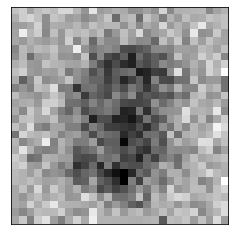

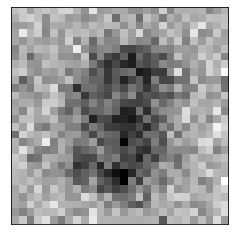

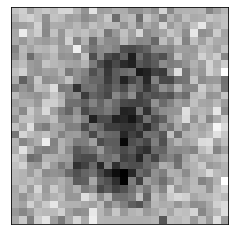

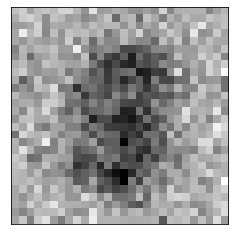




2000


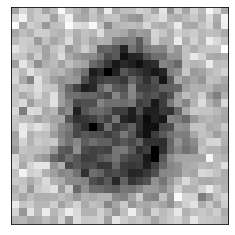

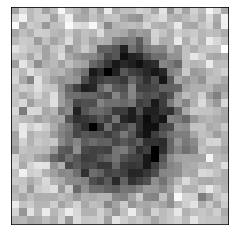

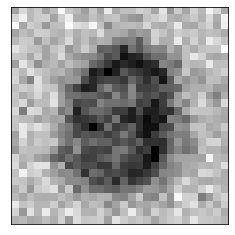

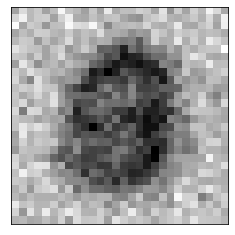

In [32]:
for epoch in range(epochs):
    
    if epoch%printing_steps==0:
        print(epoch)

    # training discriminator
    for d_step in range(d_steps):
        dis.zero_grad()
        
        # training discriminator on real data
        for inp_real,_ in dataloader_mnist_train:
            inp_real_x = inp_real
            break

        inp_real_x = inp_real_x.reshape(4,784)
        dis_real_out = dis(inp_real_x)
        dis_real_loss = criteriond1(dis_real_out,Variable(torch.ones(batch_size,1))) ## 将真图判断为真图。
        dis_real_loss.backward()

        # training discriminator on data produced by generator
        inp_fake_x_gen = make_some_noise()
        dis_inp_fake_x = gen(inp_fake_x_gen).detach() #output from generator is generated
        dis_fake_out = dis(dis_inp_fake_x)
        dis_fake_loss = criteriond1(dis_fake_out,Variable(torch.zeros(batch_size,1))) ## 将假图判断为假图。
        dis_fake_loss.backward()

        optimizerd1.step()
        
        
            
    # training generator
    for g_step in range(g_steps):
        gen.zero_grad()
        
        #generating data for input for generator
        gen_inp = make_some_noise()
        
        gen_out = gen(gen_inp)
        dis_out_gen_training = dis(gen_out)
        gen_loss = criteriond2(dis_out_gen_training,Variable(torch.ones(batch_size,1))) ## 尽量将假图判断为真图。
        gen_loss.backward()
        
        optimizerd2.step()
        
    if epoch%printing_steps==0:
        plot_img(gen_out[0])
        plot_img(gen_out[1])
        plot_img(gen_out[2])
        plot_img(gen_out[3])
        print("\n\n")
        
        

In [22]:
# for a,b in dataloader_mnist_train:
#     print a.shape
#     break

In [23]:
# a = a.reshape(4,784)

In [24]:
# a_out = gen(make_some_noise())

In [25]:
# s = torch.rand(4,784)

In [26]:
# s_out = dis(s)

In [33]:
gen

generator(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=300, out_features=1000, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=1000, out_features=800, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=800, out_features=784, bias=True)
  )
)

In [34]:
t1 = gen(make_some_noise())

In [35]:
t1.shape

torch.Size([4, 784])

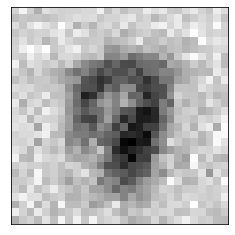

In [36]:
plot_img(t1[0])

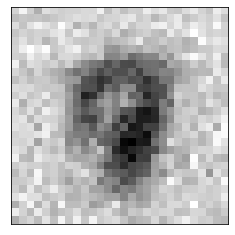

In [37]:
plot_img(t1[1])

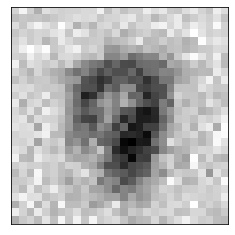

In [38]:
plot_img(t1[2])

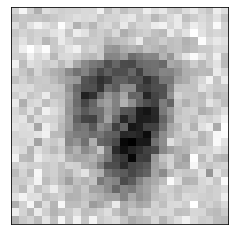

In [39]:
plot_img(t1[3])

In [40]:
t2 = gen(torch.randn(4,100))

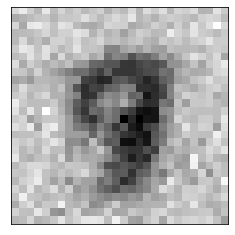

In [41]:
plot_img(t2[3])

In [42]:
t1

tensor([[ 0.0020, -0.0912,  0.0115,  ...,  0.0123,  0.0637,  0.0766],
        [ 0.0015, -0.0915,  0.0114,  ...,  0.0119,  0.0640,  0.0782],
        [ 0.0025, -0.0907,  0.0131,  ...,  0.0126,  0.0643,  0.0768],
        [ 0.0019, -0.0913,  0.0120,  ...,  0.0117,  0.0642,  0.0770]],
       grad_fn=<AddmmBackward0>)